# Investigation into variance of estimators across time 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_data=pd.read_csv('/home/jovyan/personal/Changepoint_LOB/Lasso_OLS_CPD/btc_data/lasso_cpd.csv')
df_data['date']=[pd.to_datetime(i).round('60min') for i in df_data['timestamp']]
df_data

,timestamp,exchange_5,symbol_5,spread_mean_5,midprice_mean_5,bbo_imbalance_mean_5,trade_side_mean_5,trade_count_5,Volume_5,Returns_5,Lambda_5,Roll_30,Target_Return_5,Target_Return_30,Target_Price_Dir5,Target_Price_Dir30,date
0,2022-05-01 00:01:00+00:00,ftx,BTCUSDP,1.237569,37644.414365,0.403511,0.872727,55.0,12.4781,-0.026586,-0.002131,0.021322,-0.046025,-0.000391,0,0,2022-05-01 00:00:00+00:00
1,2022-05-01 00:01:05+00:00,ftx,BTCUSDP,1.164634,37627.088415,0.149784,0.772727,22.0,0.8045,-0.046025,-0.057210,0.040481,0.012354,-0.000254,1,0,2022-05-01 00:00:00+00:00
2,2022-05-01 00:01:10+00:00,ftx,BTCUSDP,1.076023,37631.736842,0.593047,0.181818,22.0,2.0200,0.012354,0.006116,0.028232,0.007161,0.004588,1,1,2022-05-01 00:00:00+00:00
3,2022-05-01 00:01:15+00:00,ftx,BTCUSDP,1.016393,37634.431694,0.168064,1.000000,14.0,0.6338,0.007161,0.011299,0.027470,0.002561,0.000981,1,1,2022-05-01 00:00:00+00:00
4,2022-05-01 00:01:20+00:00,ftx,BTCUSDP,1.117647,37635.395425,0.283183,0.588235,34.0,3.8159,0.002561,0.000671,0.016942,-0.007302,-0.001916,0,0,2022-05-01 00:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
793039,2022-08-01 23:59:05+00:00,ftx,BTCUSDP,1.000000,23294.500000,0.096426,0.400000,5.0,1.5149,-0.005071,-0.003347,0.003199,0.000000,-0.007931,1,0,2022-08-02 00:00:00+00:00
793040,2022-08-01 23:59:10+00:00,ftx,BTCUSDP,1.000000,23294.500000,0.098081,1.000000,4.0,0.1206,0.000000,0.000000,0.002105,-0.003080,-0.005963,0,0,2022-08-02 00:00:00+00:00
793041,2022-08-01 23:59:15+00:00,ftx,BTCUSDP,1.011299,23293.782486,0.195267,1.000000,9.0,0.6616,-0.003080,-0.004656,0.000951,-0.006821,-0.019758,0,0,2022-08-02 00:00:00+00:00
793042,2022-08-01 23:59:20+00:00,ftx,BTCUSDP,1.000000,23292.193642,0.090106,0.941176,17.0,1.0871,-0.006821,-0.006274,0.001520,-0.007271,0.008540,0,1,2022-08-02 00:00:00+00:00


In [3]:
mean_return_beta=pd.read_csv('/home/jovyan/personal/Changepoint_LOB/Lasso_OLS_CPD/btc_data/mean_return_beta.csv')
mean_dir_return_beta=pd.read_csv('/home/jovyan/personal/Changepoint_LOB/Lasso_OLS_CPD/btc_data/mean_dir_return_beta.csv')
price_dir_30_beta=pd.read_csv('/home/jovyan/personal/Changepoint_LOB/Lasso_OLS_CPD/btc_data/price_dir_30_beta.csv')

In [4]:
n=60*60/5

# Estimator For True Error Variance across Time
- Interpreted as the sample variance in targets as we estimate  via the SSR/m(N-p-1) for each target of a given linear model
- Latent process is true variance of targets

### Mean Return 5 Seconds 

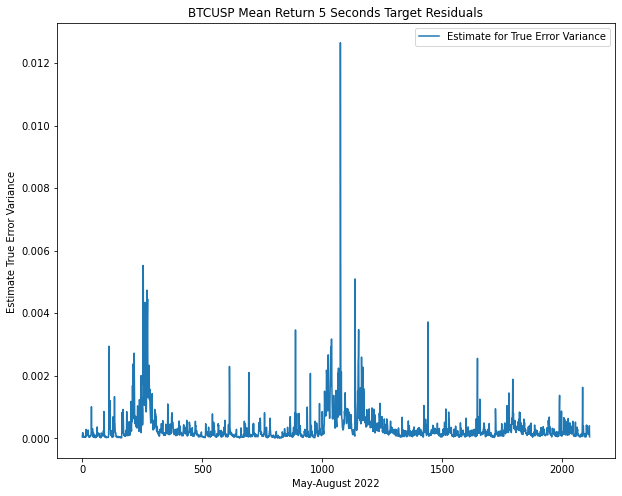

In [5]:
p=3

fig,ax=plt.subplots(1,figsize=(10,8))
ax.set_title("BTCUSP Mean Return 5 Seconds Target Residuals")
ax.plot(mean_return_beta['residuals']/(n-p-1),label='Estimate for True Error Variance')
ax.set_xlabel("May-August 2022")
ax.set_ylabel("Estimate True Error Variance ")
ax.legend()

### Price Direction Return 5 Seconds

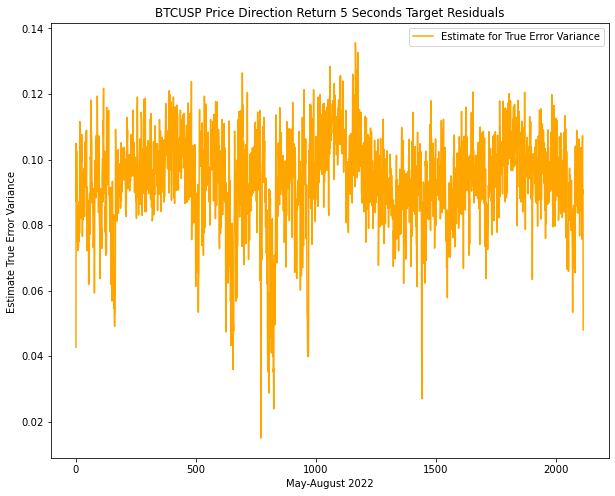

In [6]:
p=6

fig,ax=plt.subplots(1,figsize=(10,8))
ax.set_title("BTCUSP Price Direction Return 5 Seconds Target Residuals")
ax.plot(mean_dir_return_beta['residuals']/(n-p-1),label='Estimate for True Error Variance',color='orange')
ax.set_xlabel("May-August 2022")
ax.set_ylabel("Estimate True Error Variance ")
ax.legend()

### Price Direction Return 30 Seconds

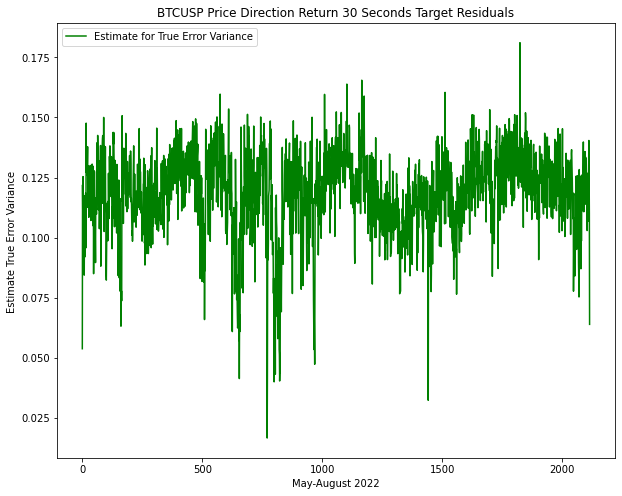

In [7]:
p=4

fig,ax=plt.subplots(1,figsize=(10,8))
ax.set_title("BTCUSP Price Direction Return 30 Seconds Target Residuals")
ax.plot(price_dir_30_beta['residuals']/(n-p-1),label='Estimate for True Error Variance',color='green')
ax.set_xlabel("May-August 2022")
ax.set_ylabel("Estimate True Error Variance ")
ax.legend()

Notes
- Latter two seem to be stationary, target mean return might follow a changepoint process

### Overview

- We have a set of random variables noted as 'Targets' which we have constructed a linear model of random variables called 'Features' which have shown to be influential via Lasso
- We can use OLS to estimate the best fitted model across time to compute the estimator's mean and std
        - Intuitively these are going to change throughout time -> showing a change in influence of each variable on our target
        - Change in sample mean portarys a difference in signficance, while change in variance represents difference in uncertainty
- We can detect changepoints in both the mean and variance of our beta estimates, which follow a normal distribution according to OLS assumptions


### Applications of Methodology
- Dynamic programming, Pelt, LASSO can all be applied to the change in mean problem -> which is of interest when determining change of influence across time
- Lasso applied to univariate variance process (Polak) can be utilized for changepoint detection in difference of estimator's variance 
    - Here we can assume the true variance of the estimator is a latent process following piecewise constant process
    - Penalize by L1 on difference in observed variance of estimator


### Discrete Estimation
- Both cases we discretely estimate, but under high-frequency assumptions can show asymptotic results 

### What if we wish to build a regression framework assuming features have piecewise constant variance -> instead of constant 
- Interpreted as the sample variance within our features
- Latent Process is true variance of our features

Relation to Weighted least squares here as we assume variance is not constant across time

### Mean Return 5 Seconds

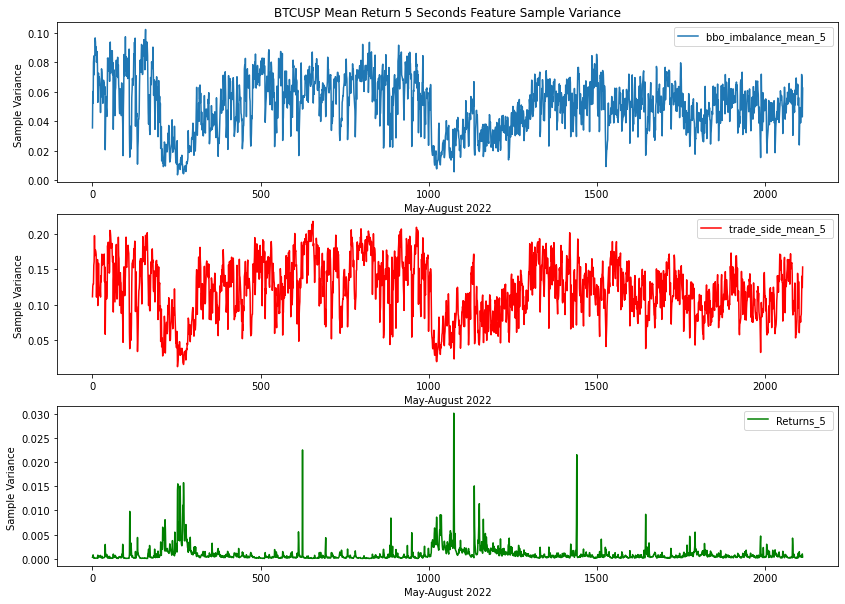

In [10]:

fig,ax=plt.subplots(3,1,figsize=(14,10))
ax[0].set_title("BTCUSP Mean Return 5 Seconds Feature Sample Variance")
ax[0].plot(mean_return_beta['bbo_imbalance_mean_5_sample_var'],label='bbo_imbalance_mean_5 ')
ax[1].plot(mean_return_beta['trade_side_mean_5_sample_var'],color='red',label='trade_side_mean_5 ')
ax[2].plot(mean_return_beta['Returns_5_sample_var'],color='green',label='Returns_5 ')
ax[0].set_xlabel("May-August 2022")
ax[1].set_xlabel("May-August 2022")
ax[2].set_xlabel("May-August 2022")
ax[0].set_ylabel("Sample Variance ")
ax[1].set_ylabel("Sample Variance ")
ax[2].set_ylabel("Sample Variance ")
ax[0].legend()
ax[1].legend()
ax[2].legend()

### Price Direction Return 5 Seconds

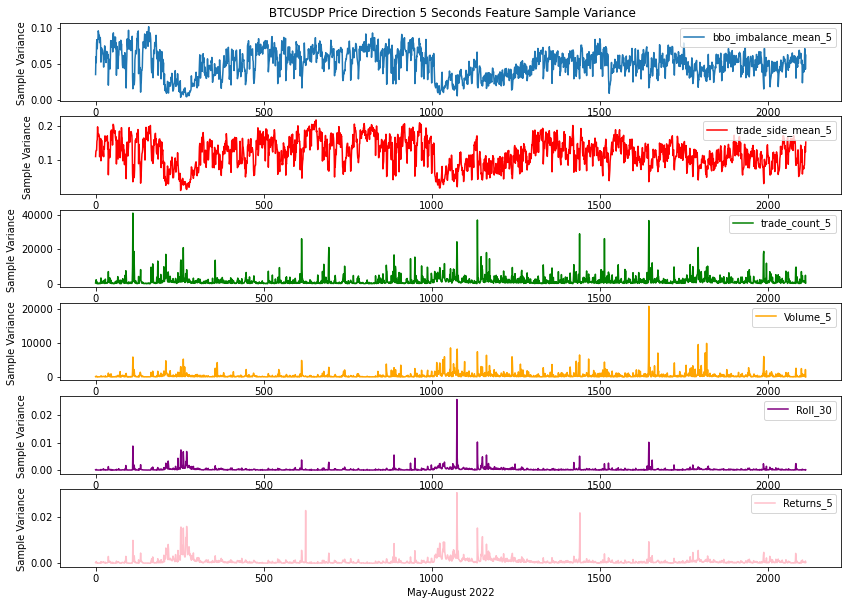

In [11]:
fig,ax=plt.subplots(6,1,figsize=(14,10))
ax[0].set_title(" BTCUSDP Price Direction 5 Seconds Feature Sample Variance")
ax[0].plot(mean_dir_return_beta['bbo_imbalance_mean_5_sample_var'],label='bbo_imbalance_mean_5')
ax[1].plot(mean_dir_return_beta['trade_side_mean_5_sample_var'],color='red',label='trade_side_mean_5')
ax[2].plot(mean_dir_return_beta['trade_count_5_sample_var'],color='green',label='trade_count_5')
ax[3].plot(mean_dir_return_beta['Volume_5_sample_var'],color='orange',label='Volume_5')
ax[4].plot(mean_dir_return_beta['Roll_30_sample_var'],color='purple',label='Roll_30')
ax[5].plot(mean_return_beta['Returns_5_sample_var'],color='pink',label='Returns_5')

ax[5].set_xlabel("May-August 2022")
ax[0].set_ylabel("Sample Variance ")
ax[1].set_ylabel("Sample Variance ")
ax[2].set_ylabel("Sample Variance ")
ax[3].set_ylabel("Sample Variance ")
ax[4].set_ylabel("Sample Variance ")
ax[5].set_ylabel("Sample Variance ")
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()
ax[4].legend()
ax[5].legend()

### Price Direction 30 Seconds 

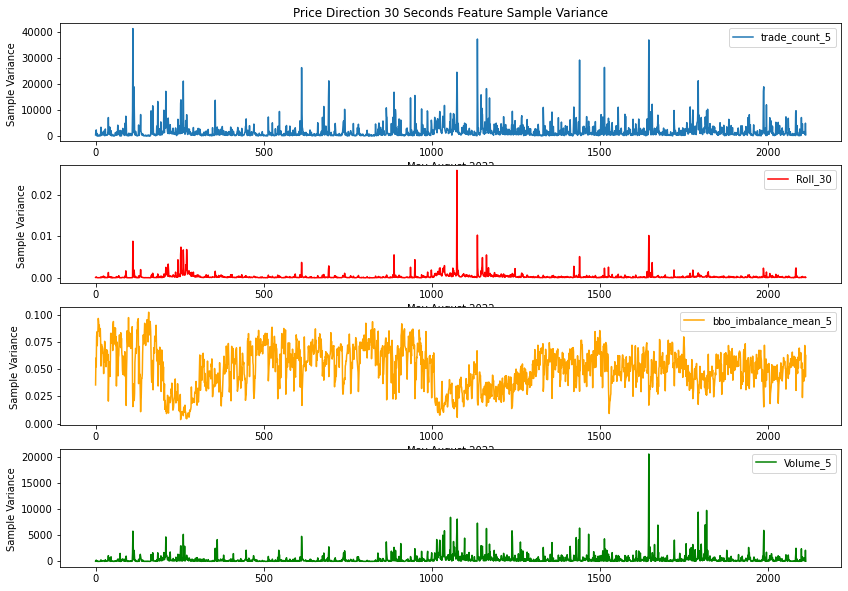

In [12]:
fig,ax=plt.subplots(4,1,figsize=(14,10))
ax[0].set_title("Price Direction 30 Seconds Feature Sample Variance")
ax[0].plot(price_dir_30_beta['trade_count_5_sample_var'],label='trade_count_5')
ax[1].plot(price_dir_30_beta['Roll_30_sample_var'],color='red',label='Roll_30')
ax[2].plot(price_dir_30_beta['bbo_imbalance_mean_5_sample_var'],color='orange',label='bbo_imbalance_mean_5')
ax[3].plot(price_dir_30_beta['Volume_5_sample_var'],color='green',label='Volume_5')
ax[0].set_xlabel("May-August 2022")
ax[1].set_xlabel("May-August 2022")
ax[2].set_xlabel("May-August 2022")
ax[0].set_ylabel("Sample Variance ")
ax[1].set_ylabel("Sample Variance ")
ax[2].set_ylabel("Sample Variance ")
ax[3].set_ylabel("Sample Variance ")
ax[0].legend()
ax[1].legend()
ax[2].legend()
ax[3].legend()